In [50]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = np.random.randn(m, 1)
y = 0.5* X**2 + X + 2 + np.random.randn(m, 1)

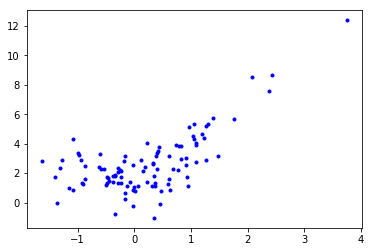

In [51]:
plt.plot(X, y, 'b.')

In [61]:
class Poly_reg():
    '''
    Class that finding vector a in equation:
    an*x**n + an*x**n-1 + ...+ a2*x**2 + a1*x**1 + a0
    '''
    def __init__(self, N = 2, lr = 0.1, alpha = 1, include_bias = True, max_iter = 1000):
        '''
        X - Data
        N - Poly degree
        lr - Learning Rate
        include_bias - fit bias or not.
        '''
        self.N = N
        self.lr = lr
        self.alpha = alpha
        self.max_iter = max_iter
        self.include_bias = include_bias
        self.A = np.identity(N+1)
            
    def add_poly_features(self, X):
        if self.include_bias:
            X = np.hstack((np.ones((len(X), 1)), X))
            
        for i in range(2, self.N+1):
            degree = (X[:,1]**i).reshape(len(X), 1)
            X = np.hstack(( X ,degree))
        return X
    
    def fit(self, X, y):
        self.X_B = self.add_poly_features(X)
        self.theta = np.random.uniform(-1,1, (self.N+1, 1))
        self.m = len(X)
        
#         Calculating Gradients once every step

#         for i in range(self.max_iter):
#             gradients = 2/self.m * self.X_B.T.dot(self.X_B.dot(self.theta) - y)
#             self.theta -= self.lr * gradients

#         CLOSED FORM SOLUTION
#         self.theta = np.linalg.inv(self.X_B.T.dot(self.X_B)).dot(self.X_B.T).dot(y)
        
        self.theta = np.linalg.inv(self.X_B.T.dot(self.X_B)+self.alpha*self.A).dot(self.X_B.T).dot(y)
        
    
    def predict(self, X):
        X = self.add_poly_features(X)
        
        return X.dot(self.theta)
               
    
pr = Poly_reg(2, alpha = 50)
pr.fit(X, y)
print(pr.theta)
predicted = pr.predict(X)

[[ 1.22196804]
 [ 0.49214771]
 [ 0.79999585]]


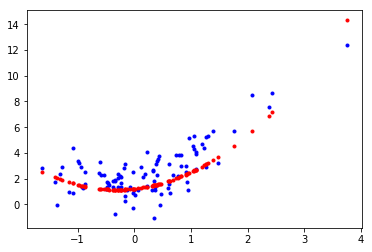

In [62]:
plt.plot(X, y, 'b.')
plt.plot(X, predicted,'r.')

<h1>Polynomial regression with sklearn</h1>

In [16]:
from sklearn.preprocessing import PolynomialFeatures
Pf = PolynomialFeatures(degree=7, include_bias=False)
X_poly = Pf.fit_transform(X)
new = [[-3],
       [3]]
new_poly = Pf.fit_transform(new)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_poly, y)
predicted = lr.predict(X_poly)

In [19]:
lr.intercept_, lr.coef_

(array([ 1.90795886]),
 array([[ 1.01566639,  0.44790871,  0.29010701,  0.14783818, -0.18761224,
         -0.02152595,  0.02219496]]))

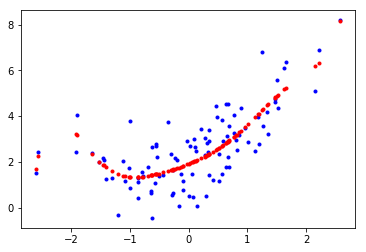

In [20]:
plt.plot(X, y, 'b.')
plt.plot(X, predicted,'r.')

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    train, test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, test_errors = [], []
    for m in range(1, len(train)):
        model.fit(train[:m], y[:m])
        train_predict = model.predict(train[:m])
        test_predict = model.predict(test)
        train_errors.append(mean_squared_error(train_predict, y[:m]))
        test_errors.append(mean_squared_error(test_predict, y_test))
    plt.plot(np.sqrt(train_errors), 'r-+', label = 'Train')
    plt.plot(np.sqrt(test_errors), 'b-', label = 'Test')
    plt.xlabel('Size of training')
    plt.ylabel('RMSE')
    plt.legend()
    plt.ylim([0,2])
    plt.show()

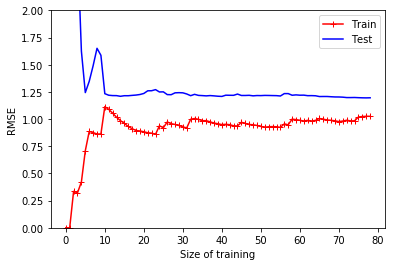

In [31]:
plot_learning_curves(lr, X, y)

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=7, include_bias = False)),
    ('linear_reg', LinearRegression()),
])

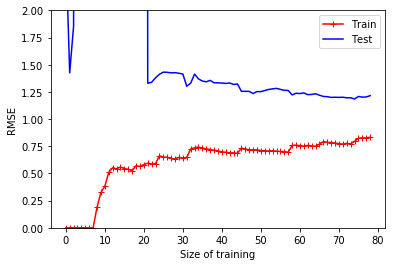

In [34]:
plot_learning_curves(polynomial_regression, X, y)